音频数据 shape: (117786,)
采样率: 44100 Hz


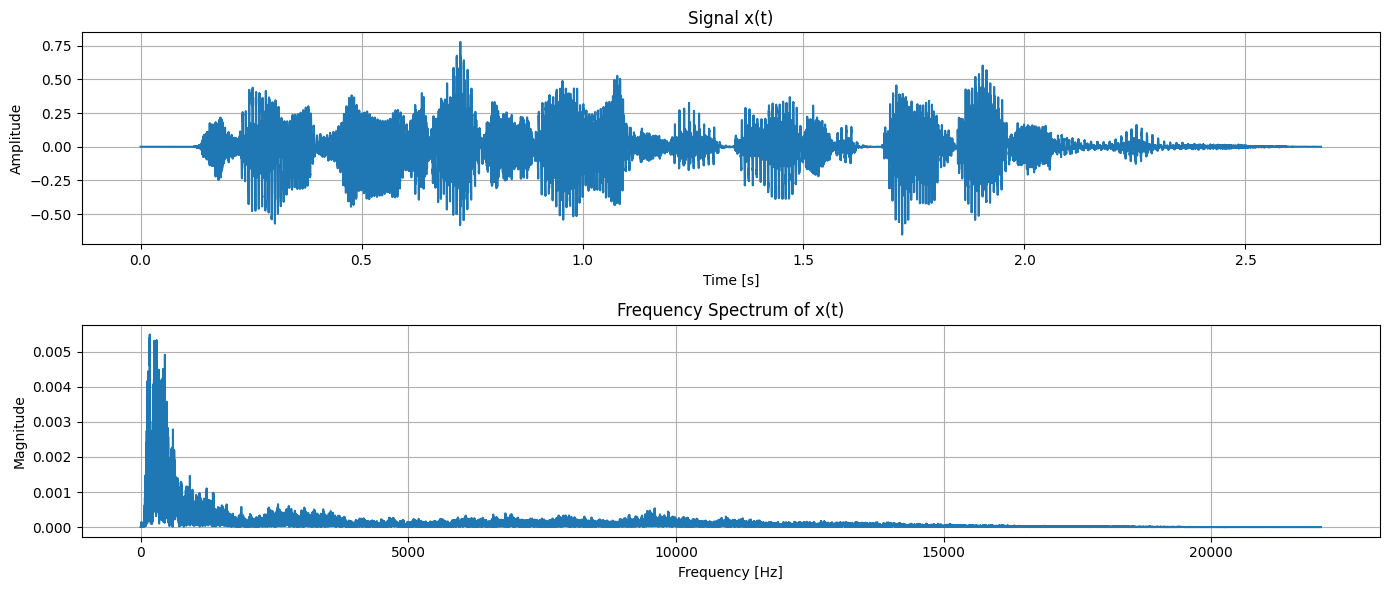

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#使用sf读取wav文件
import soundfile as sf
# 指定要读取的wav文件路径
file_path = '../examples/default.wav'
# 使用soundfile库读取wav文件
data, samplerate = sf.read(file_path)
print(f'音频数据 shape: {data.shape}')
print(f'采样率: {samplerate} Hz')
'''
# 定义信号参数
fs = 5000  # 采样率
T = 2  # 信号时长
t = np.linspace(0, T, int(fs*T), endpoint=False)  # 时间数组

# 定义信号
x = np.piecewise(t, 
                 [t < 0.5, (t >= 0.5) & (t < 1), t >= 1], 
                 [lambda t: np.cos(440*np.pi*t), 
                  lambda t: np.cos(660*np.pi*t), 
                  lambda t: np.cos(524*np.pi*t)])

'''
T = len(data)/samplerate
x=data
fs=samplerate
t= np.linspace(0, T, int(fs*T), endpoint=False)  # 时间数组
# 计算频谱
X = np.fft.fft(x)
frequencies = np.fft.fftfreq(len(X), 1/fs)
X_magnitude = np.abs(X) / len(X)

# 绘制信号
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Signal x(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
# 绘制频谱
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], X_magnitude[:len(X_magnitude)//2])
plt.title('Frequency Spectrum of x(t)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

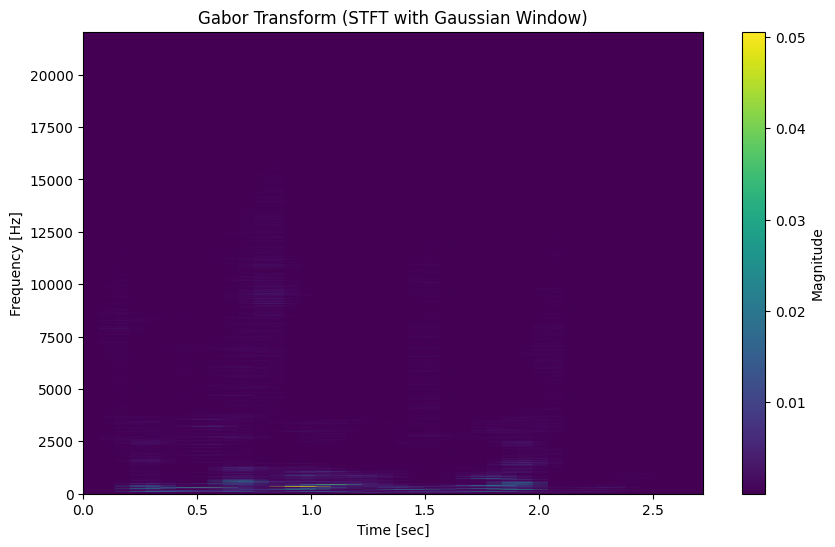

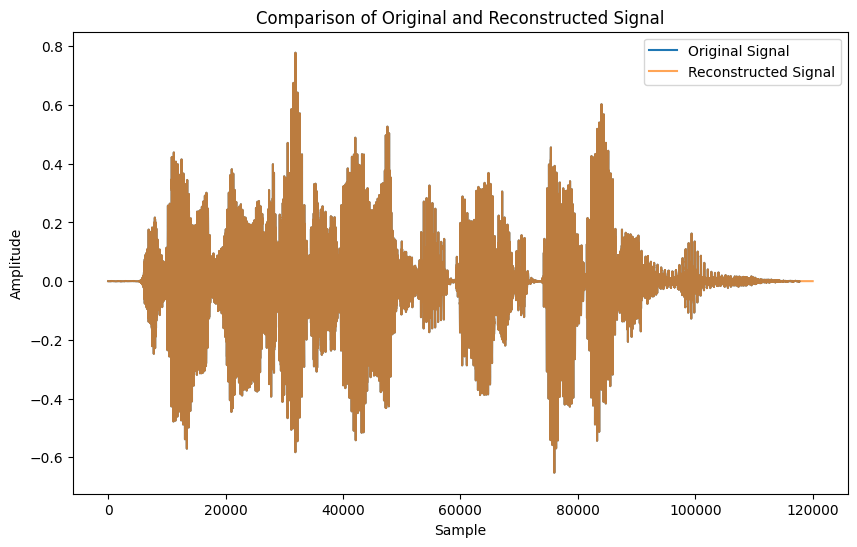

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft

# 读取音频文件
sampling_rate=samplerate
data = x

# 如果音频是立体声，将其转换为单声道
if len(data.shape) > 1:
    data = data.mean(axis=1)

# 定义STFT参数
nperseg = 12000  # 每个段的长度（窗长）
noverlap = nperseg // 2  # 段之间的重叠部分
from scipy.signal import stft, windows,istft
# 创建高斯窗
gaussian_window = windows.gaussian(nperseg, std=nperseg/6)

# 计算STFT（加伯变换）
frequencies, times, Zxx = stft(data, fs=sampling_rate, window=gaussian_window, nperseg=nperseg, noverlap=noverlap)

# 绘制加伯变换结果
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('Gabor Transform (STFT with Gaussian Window)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()


# 使用ISTFT将加伯变换结果还原为声波信号
_, reconstructed_signal = istft(Zxx, fs=sampling_rate, window=gaussian_window, nperseg=nperseg, noverlap=noverlap)

# 绘制原始信号和重建信号进行对比
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Signal')
plt.plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7)
plt.title('Comparison of Original and Reconstructed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 保存重建的音频信号为WAV文件
#wavfile.write('reconstructed_signal.wav', sampling_rate, reconstructed_signal)
import torch,torchaudio
torchaudio.save('reconstructed_signal.wav', torch.tensor(reconstructed_signal,dtype=torch.float32).reshape(1,-1), 24000)


In [13]:
reconstructed_signal

array([-3.05175781e-05, -3.05175781e-05, -6.10351562e-05, ...,
        1.26566399e-20,  8.89137865e-21,  7.08477573e-21])